In [7]:
%pip install numpy matplotlib scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400
(9909, 1)
(9909,)


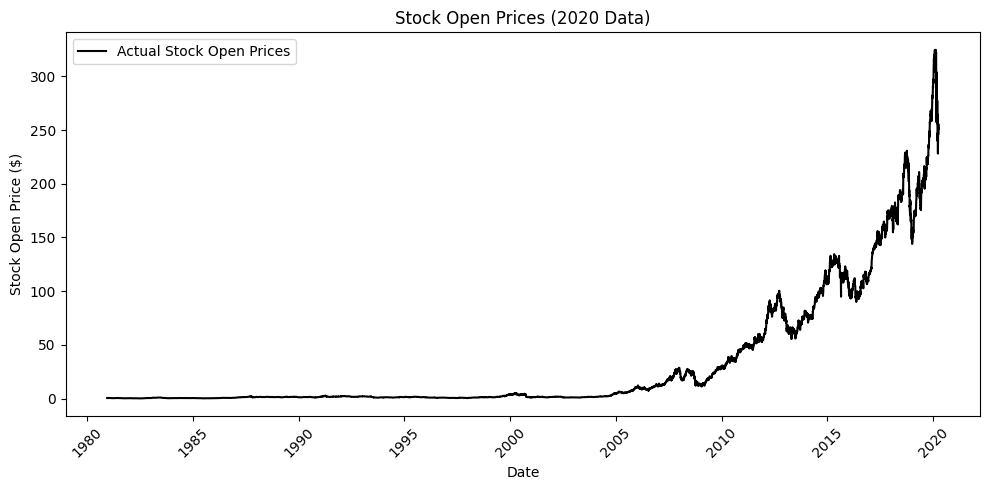

OLS Model: y = -41.96 + 0.01 * X
Ridge Model: y = -41.96 + 0.01 * X
Lasso Model: y = -41.95 + 0.01 * X
ElasticNet Model: y = -41.96 + 0.01 * X


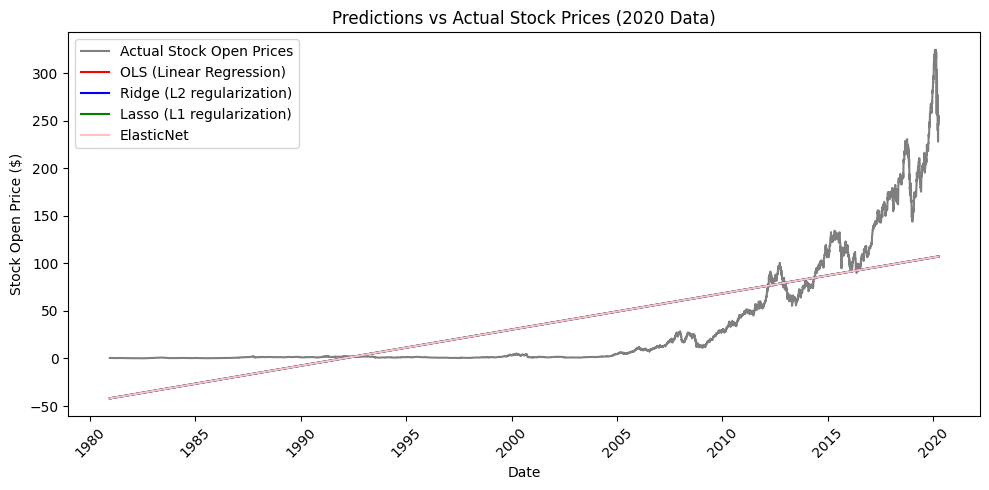

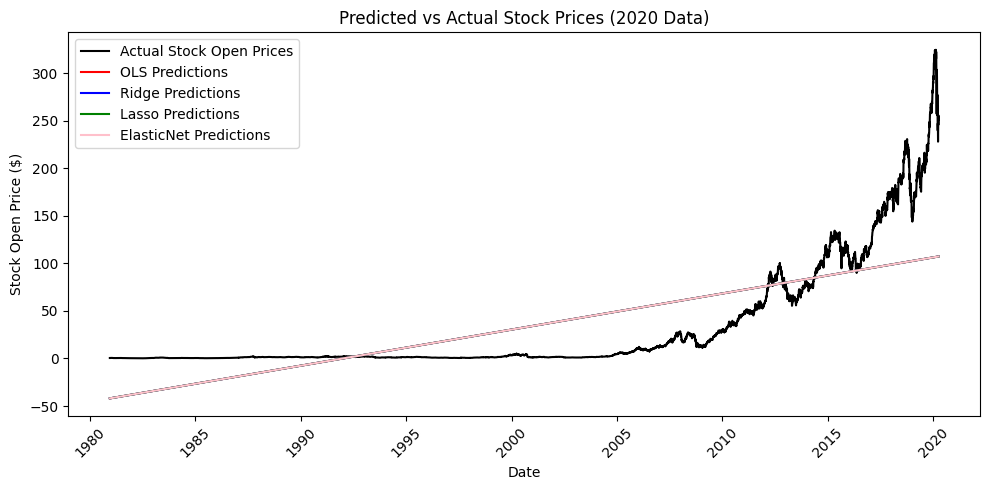

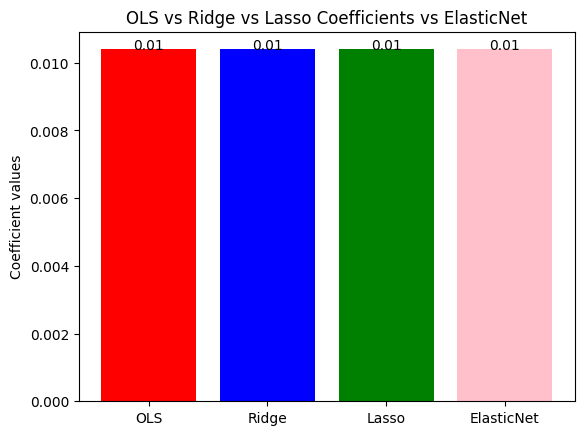

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


stock_data_file = 'AAPL.csv'

original_stock_data = pd.read_csv(stock_data_file, index_col=0, parse_dates=True, header=0)

stock_data = original_stock_data

# Show the first few rows of the data to confirm
print(stock_data.head())

# Get the last 1000 rows
#last_n_data = 5
#stock_data = stock_data.tail(last_n_data)
#print(stock_data.head())

# Convert index to datetime format (if it's not already)
original_stock_data.index = pd.to_datetime(original_stock_data.index)
stock_data.index = pd.to_datetime(stock_data.index)

# Convert 'Date' to a numeric format (days since the first date)
stock_data['Date_numeric'] = (stock_data.index - stock_data.index[0]).days

# Set X as the numeric 'Date' column and y as the 'Open' price
X = stock_data['Date_numeric'].values.reshape(-1, 1)  # Feature (Date in numeric form)
y = stock_data['Open'].values  # Target (Open prices)

print(X.shape)
print(y.shape)

# Plot the actual 'Open' prices
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, y, color="black", label="Actual Stock Open Prices")

plt.xlabel("Date")
plt.ylabel("Stock Open Price ($)")
plt.title("Stock Open Prices (2020 Data)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
Example for X and y visually

X = np.array([0.51339287, 0.4888393, 0.453125, 250.74000549]) -> List[float]
              
              
y = np.array([-4.39584951e+01, -4.08385000e+01, -4.16085043e+01]) -> List[float]
 

"""

# Define models
ols = LinearRegression()
ridge = Ridge(alpha=100.0)  # L2 regularization
lasso = Lasso(alpha=10)  # L1 regularization
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)  # L1 és L2 regularization combination

# Train models
ols.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)
elasticnet.fit(X, y)


"""
Ridge
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.

Lasso
The Lasso is a linear model that estimates sparse coefficients with l1 regularization.

ElasticNet
Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.
"""

# Mathematical Formulas
# OLS Model:
# y = β₀ + β₁ * X
# Where:
# β₀ = intercept
# β₁ = coefficient for the feature X

# Ridge Model:
# y = β₀ + β₁ * X + λ * (β₁²)
# Where:
# β₀ = intercept
# β₁ = coefficient for the feature X
# λ = regularization parameter (L2 regularization term)

# Lasso Model:
# y = β₀ + β₁ * X + λ * |β₁|
# Where:
# β₀ = intercept
# β₁ = coefficient for the feature X
# λ = regularization parameter (L1 regularization term)

# ElasticNet Model:
# y = β₀ + β₁ * X + λ₁ * |β₁| + λ₂ * β₁²
# Where:
# β₀ = intercept
# β₁ = coefficient for the feature X
# λ₁ = regularization parameter for L1 (Lasso) term
# λ₂ = regularization parameter for L2 (Ridge) term


# OLS Coefficients
beta_0 = ols.intercept_  # Intercept
beta_1 = ols.coef_[0]    # Coefficient for the feature X
print(f"OLS Model: y = {beta_0:.2f} + {beta_1:.2f} * X")

# Ridge Coefficients
beta_0_ridge = ridge.intercept_  # Intercept
beta_1_ridge = ridge.coef_[0]    # Coefficient for the feature X
print(f"Ridge Model: y = {beta_0_ridge:.2f} + {beta_1_ridge:.2f} * X")

# Lasso Coefficients
beta_0_lasso = lasso.intercept_  # Intercept
beta_1_lasso = lasso.coef_[0]    # Coefficient for the feature X
print(f"Lasso Model: y = {beta_0_lasso:.2f} + {beta_1_lasso:.2f} * X")

# ElasticNet Coefficients
beta_0_elasticnet = elasticnet.intercept_  # Intercept
beta_1_elasticnet = elasticnet.coef_[0]    # Coefficient for the feature X
print(f"ElasticNet Model: y = {beta_0_elasticnet:.2f} + {beta_1_elasticnet:.2f} * X")

# Generate predictions based on the actual 'Date_numeric' values in the dataset
y_pred_ols = ols.predict(X)
y_pred_ridge = ridge.predict(X)
y_pred_lasso = lasso.predict(X)
y_pred_elasticnet = elasticnet.predict(X)

# Plot regression lines along with the actual data points
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, y, color="black", label="Actual Stock Open Prices", alpha=0.5)  # Actual data
plt.plot(stock_data.index, y_pred_ols, color="red", label="OLS (Linear Regression)")
plt.plot(stock_data.index, y_pred_ridge, color="blue", label="Ridge (L2 regularization)")
plt.plot(stock_data.index, y_pred_lasso, color="green", label="Lasso (L1 regularization)")
plt.plot(stock_data.index, y_pred_elasticnet, color="pink", label="ElasticNet")

plt.xlabel("Date")
plt.ylabel("Stock Open Price ($)")
plt.title("Predictions vs Actual Stock Prices (2020 Data)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the predictions vs actual stock prices for each model
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, y, color="black", label="Actual Stock Open Prices")
plt.plot(stock_data.index, y_pred_ols, color="red", label="OLS Predictions")
plt.plot(stock_data.index, y_pred_ridge, color="blue", label="Ridge Predictions")
plt.plot(stock_data.index, y_pred_lasso, color="green", label="Lasso Predictions")
plt.plot(stock_data.index, y_pred_elasticnet, color="pink", label="ElasticNet Predictions")

plt.xlabel("Date")
plt.ylabel("Stock Open Price ($)")
plt.title("Predicted vs Actual Stock Prices (2020 Data)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot coefficient values
coeffs = {
    "OLS": ols.coef_[0],
    "Ridge": ridge.coef_[0],
    "Lasso": lasso.coef_[0],
    "ElasticNet": elasticnet.coef_[0],
}

def addlabels(x, y):
    # function to add value labels
    for i in range(len(x)):
        plt.text(i, y[i], f"{y[i]:.2f}", ha='center')

plt.bar(coeffs.keys(), coeffs.values(), color=["red", "blue", "green", "pink"])
y_values = list(coeffs.values())
addlabels(coeffs.keys(), y_values)
plt.ylabel("Coefficient values")
plt.title("OLS vs Ridge vs Lasso Coefficients vs ElasticNet")
plt.show()
